In [1]:
#Importing the Libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Importing the dataset
zoo=pd.read_csv("Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
#Dropping the unwanted columns 
zoo['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [4]:
zoo=zoo.drop(['animal name'],axis=1)
zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
#Data exploration 
#Checking for null values 
zoo.isnull().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [7]:
#Descriptive Analysis 
zoo.shape

(101, 17)

In [8]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [10]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


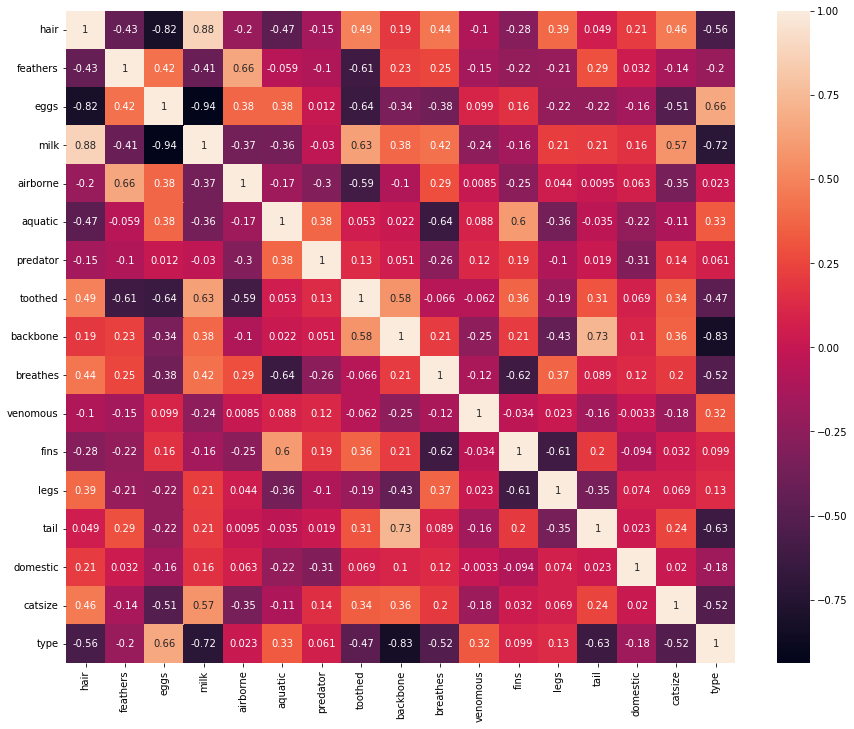

In [14]:
#DATA VISUALIZATION 
#Correlation Matrix 
import seaborn as sns 
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(15,12))
sns.heatmap(zoo.corr(),annot=True)

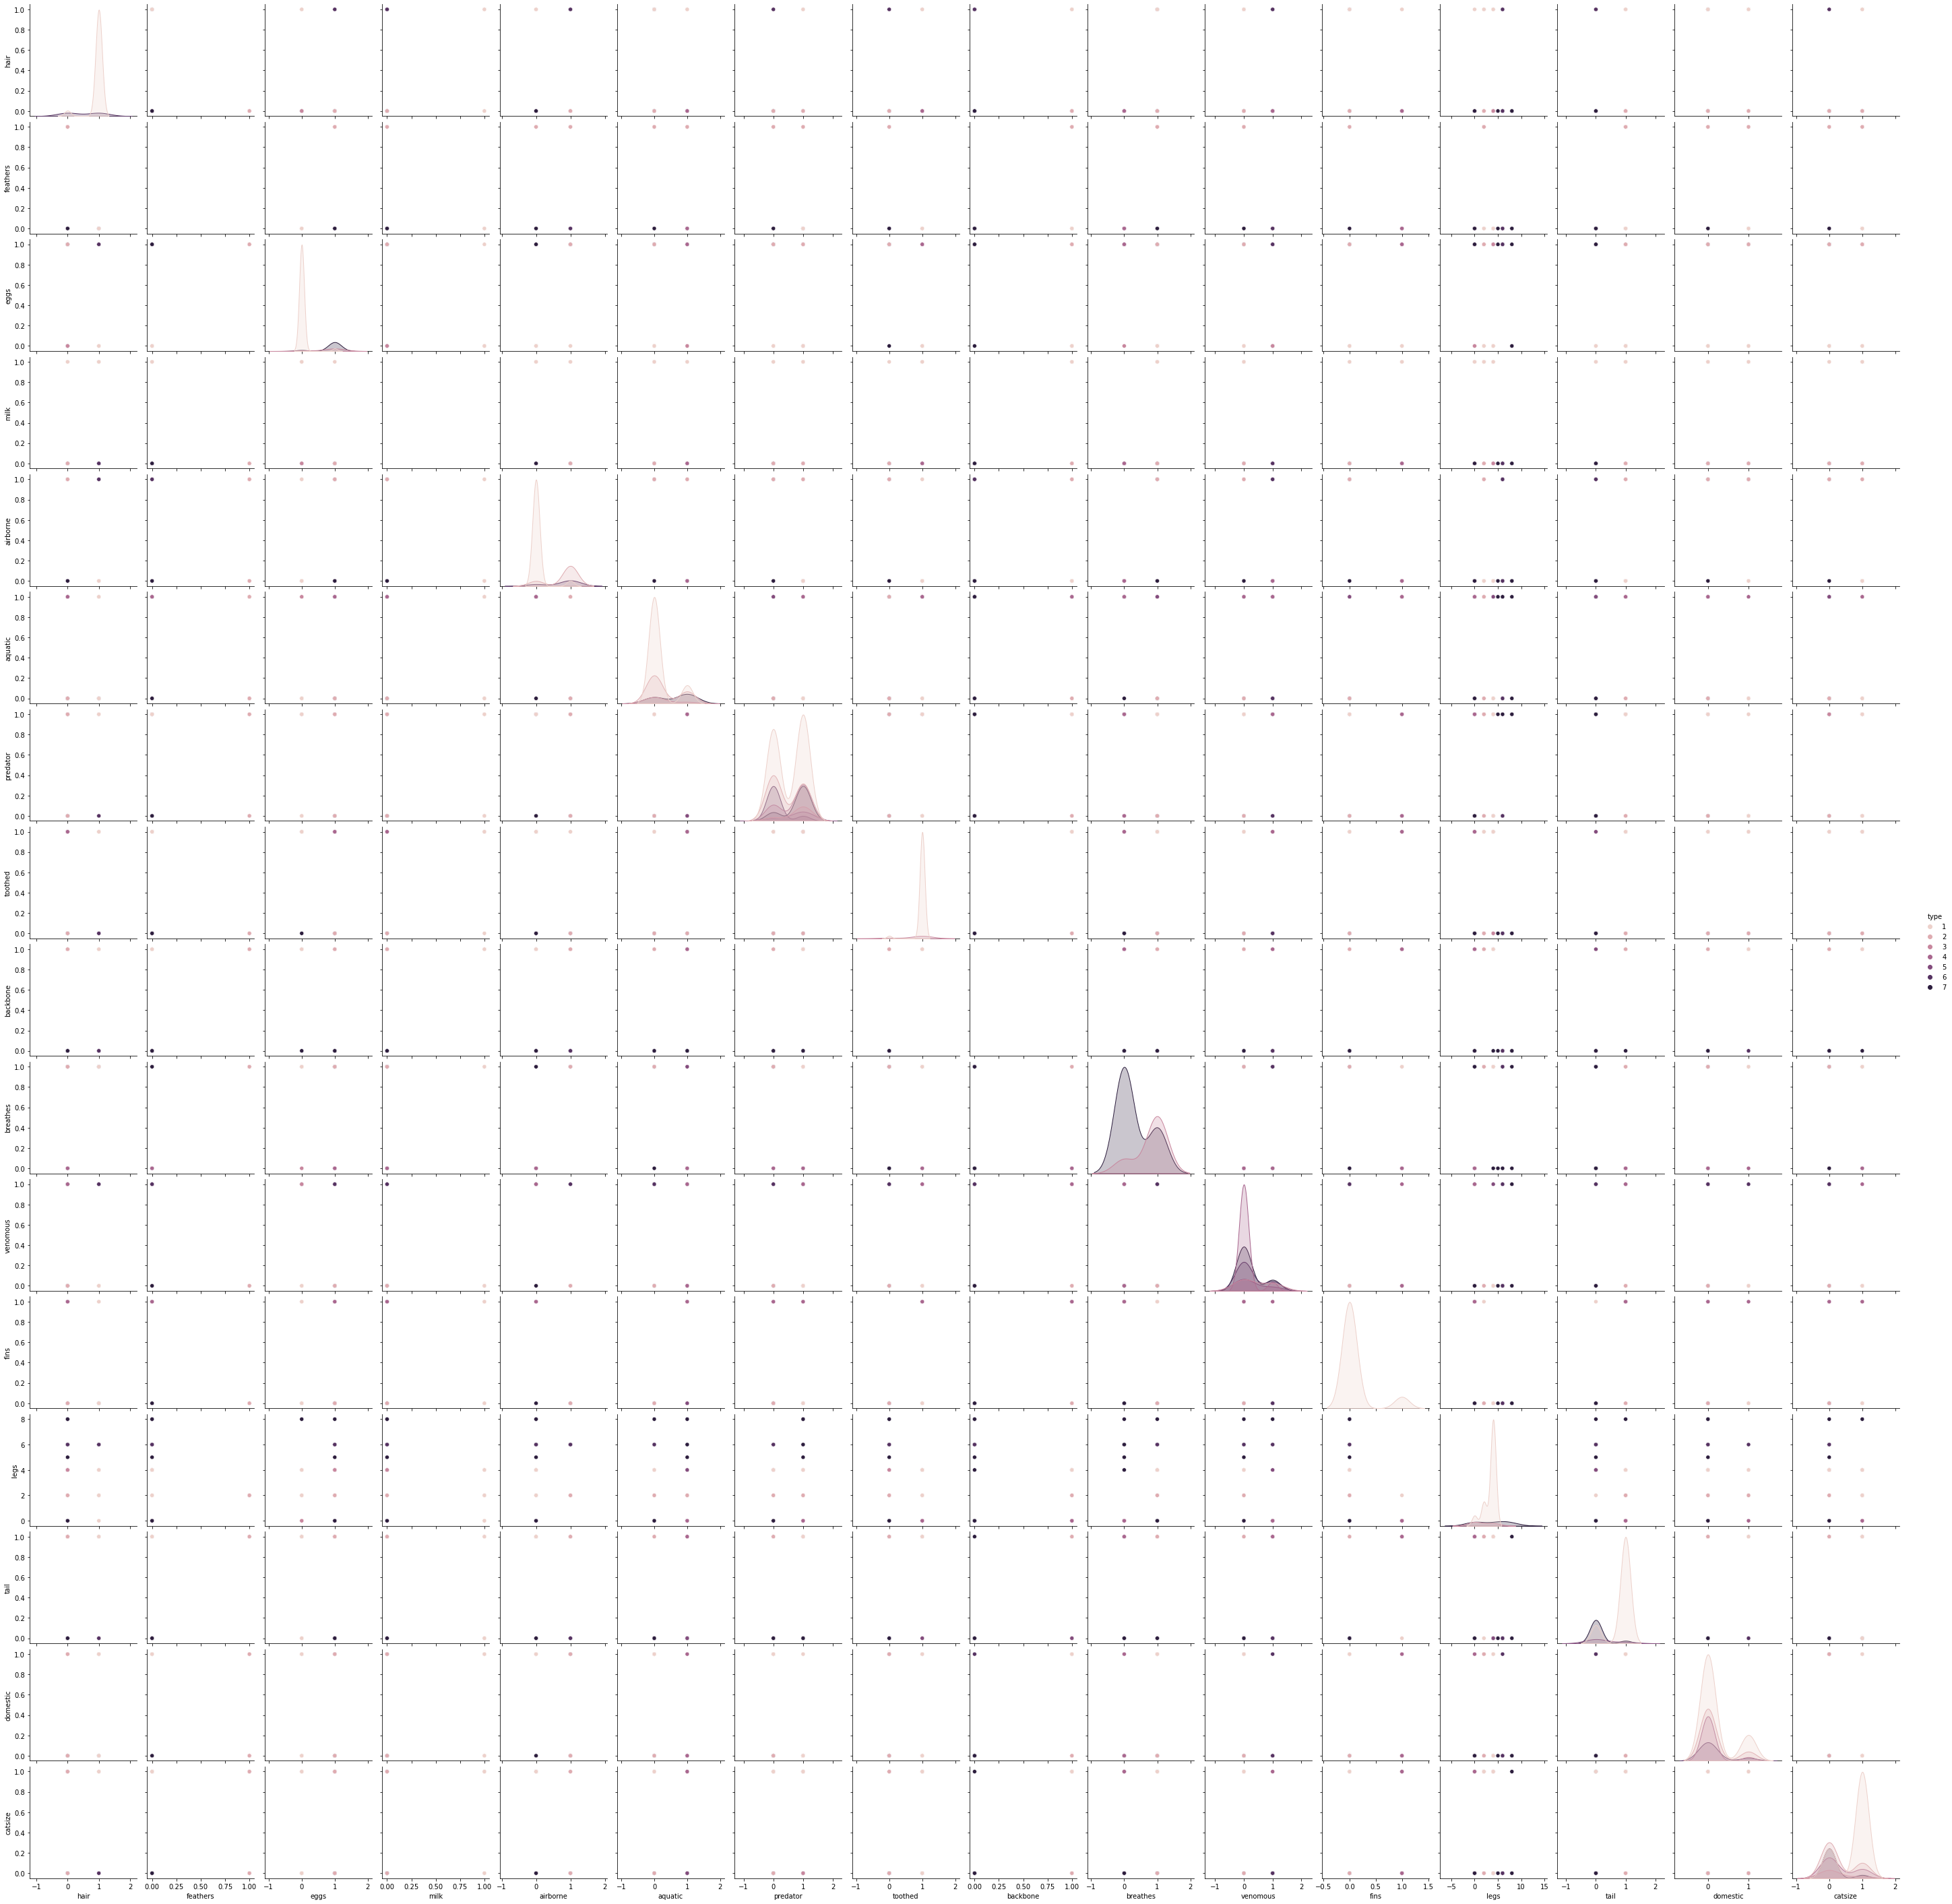

In [15]:
sns.pairplot(data=zoo,hue='type')

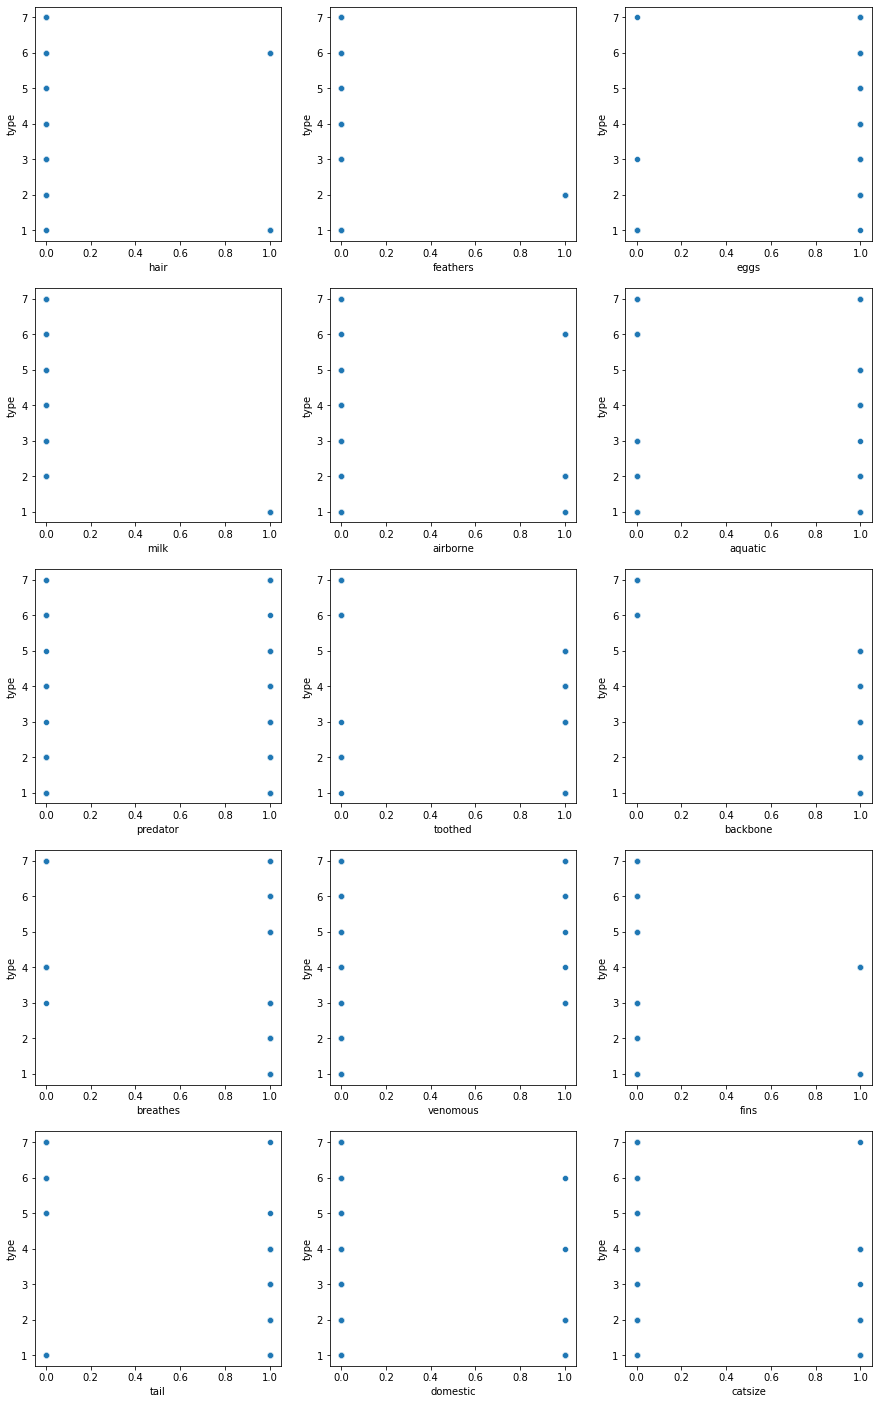

In [18]:
#Plotting scatter plots for tpye vs all columns 
fig, ax =plt.subplots(5,3, figsize=(15,25)) 
sns.scatterplot(x="hair",y="type",data=zoo,ax=ax[0,0])
sns.scatterplot(x="feathers",y="type",data=zoo,ax=ax[0,1])
sns.scatterplot(x="eggs",y="type",data=zoo,ax=ax[0,2])
sns.scatterplot(x="milk",y="type",data=zoo,ax=ax[1,0])
sns.scatterplot(x="airborne",y="type",data=zoo,ax=ax[1,1])
sns.scatterplot(x="aquatic",y="type",data=zoo,ax=ax[1,2])
sns.scatterplot(x="predator",y="type",data=zoo,ax=ax[2,0])
sns.scatterplot(x="toothed",y="type",data=zoo,ax=ax[2,1])
sns.scatterplot(x="backbone",y="type",data=zoo,ax=ax[2,2])
sns.scatterplot(x="breathes",y="type",data=zoo,ax=ax[3,0])
sns.scatterplot(x="venomous",y="type",data=zoo,ax=ax[3,1])
sns.scatterplot(x="fins",y="type",data=zoo,ax=ax[3,2])
sns.scatterplot(x="tail",y="type",data=zoo,ax=ax[4,0])
sns.scatterplot(x="domestic",y="type",data=zoo,ax=ax[4,1])
sns.scatterplot(x="catsize",y="type",data=zoo,ax=ax[4,2])

In [55]:
#Splitting the Data into Independent and Dependent variable 
x=zoo.iloc[:,0:16]
y=zoo.iloc[:,16]

In [56]:
#Initailizing KNN and defining Kfold number
num_folds=8
kfold=KFold(n_splits=8)

In [57]:
#Bulilding KNN Model and Display of Result obtained 
model=KNeighborsClassifier(n_neighbors=4)
result=cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.8878205128205128


In [64]:
#Grid Search for Algorithm Tuning 
#But First Importing the recquired Libraries 
from sklearn.model_selection import GridSearchCV

In [27]:
#Defining the number range for K-value 
n_neighbors = np.array(range(1,41))
param_grid = dict(n_neighbors=n_neighbors)
n_neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])

In [28]:
#Building the KNN model 
model=KNeighborsClassifier()
grid = GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])})

In [29]:
#Display the Optimum K value and its respective accuracy 
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

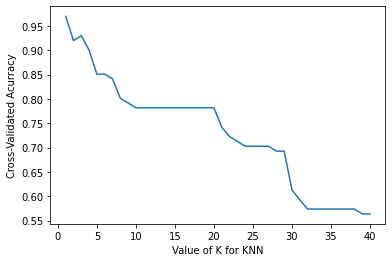

In [30]:
#From Above we found out that best value for K = 1 
#Visualizing the CV Results 
#Choose k between 1 to 41(for max 40 value)
k_range= range(1,41)
k_scores = []
#Use Iteration to calculate different K in models, then return the average Accuracy based on the Cross validation 
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn,x,y,cv=5)
  k_scores.append(scores.mean())
#Plot the graph to Visualize variation in accuracy with k values
plt.plot(k_range,k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Acurracy")
plt.show()

In [63]:
#splitting the data and cross checking 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=30)

In [65]:
knn=KNeighborsClassifier(n_neighbors=1)
model=knn.fit(x_test,y_test)
ypred1=model.predict(x_test)
model.score(x_test,y_test)

1.0

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

